# Introduction


---


Onur Ümit Şener

2006102010

# Imports

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd
import plotly.express as px
from pprint import pprint
import statistics

In [3]:
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

# Loading data

---



In [4]:
moon_noise_0    = make_moons(n_samples = 1000, noise = 0.000)
moon_noise_25   = make_moons(n_samples = 1000, noise = 0.025)
moon_noise_50   = make_moons(n_samples = 1000, noise = 0.050)
moon_noise_100  = make_moons(n_samples = 1000, noise = 0.100)
moon_noise_250  = make_moons(n_samples = 1000, noise = 0.250)

In [5]:
data_list = [
    {
        'c': moon_noise_0[1],
        'x': moon_noise_0[0][:, 0],
        'y': moon_noise_0[0][:, 1],
        'data': moon_noise_0[0],
    },
    {
        'c': moon_noise_25[1],
        'x': moon_noise_25[0][:, 0],
        'y': moon_noise_25[0][:, 1],
        'data': moon_noise_25[0],
    },
    {
        'c': moon_noise_50[1],
        'x': moon_noise_50[0][:, 0],
        'y': moon_noise_50[0][:, 1],
        'data': moon_noise_50[0],
    },
    {
        'c': moon_noise_100[1],
        'x': moon_noise_100[0][:, 0],
        'y': moon_noise_100[0][:, 1],
        'data': moon_noise_100[0],
    },
    {
        'c': moon_noise_250[1],
        'x': moon_noise_250[0][:, 0],
        'y': moon_noise_250[0][:, 1],
        'data': moon_noise_250[0],
    },
]

# Setting up methods

---



In [6]:
single = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="single"
)
average = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="average"
)
complete = cluster.AgglomerativeClustering(
    n_clusters=2, linkage="complete"
)

clustering_algorithms = [
    single,
    average,
    complete,
]

# Calculating the results

---

We are calculating the results for our linkage methods and k-means.

Then we are appending all of our data including our original data to a list of dictionaries so that we can easily access them.

In [7]:
results = []

for i, item in enumerate(data_list):

    kmeans = KMeans(n_clusters=2).fit(item['data'])

    results.append({
        'c': item['c'],
        'x': item['x'],
        'y': item['y'],
        })
    
    results.append({
        'c': kmeans.labels_,
        'x': item['x'],
        'y': item['y'],
        })

    for j, algorithm in enumerate(clustering_algorithms):

        algo = algorithm.fit(item['data'])

        results.append({
            'c': algo.labels_,
            'x': item['x'],
            'y': item['y'],
            })

## Adjusting cell labels

In [8]:
x_labels = [
    'original',
    'kmeans'
]
for algorithm in clustering_algorithms:
    x_labels.append(algorithm.linkage)
    
y_labels = [
    'no noise',
    '0.025 noise',
    '0.050 noise',
    '0.100 noise',
    '0.250 noise',
]

# Comparing the data

---



## Visualizing

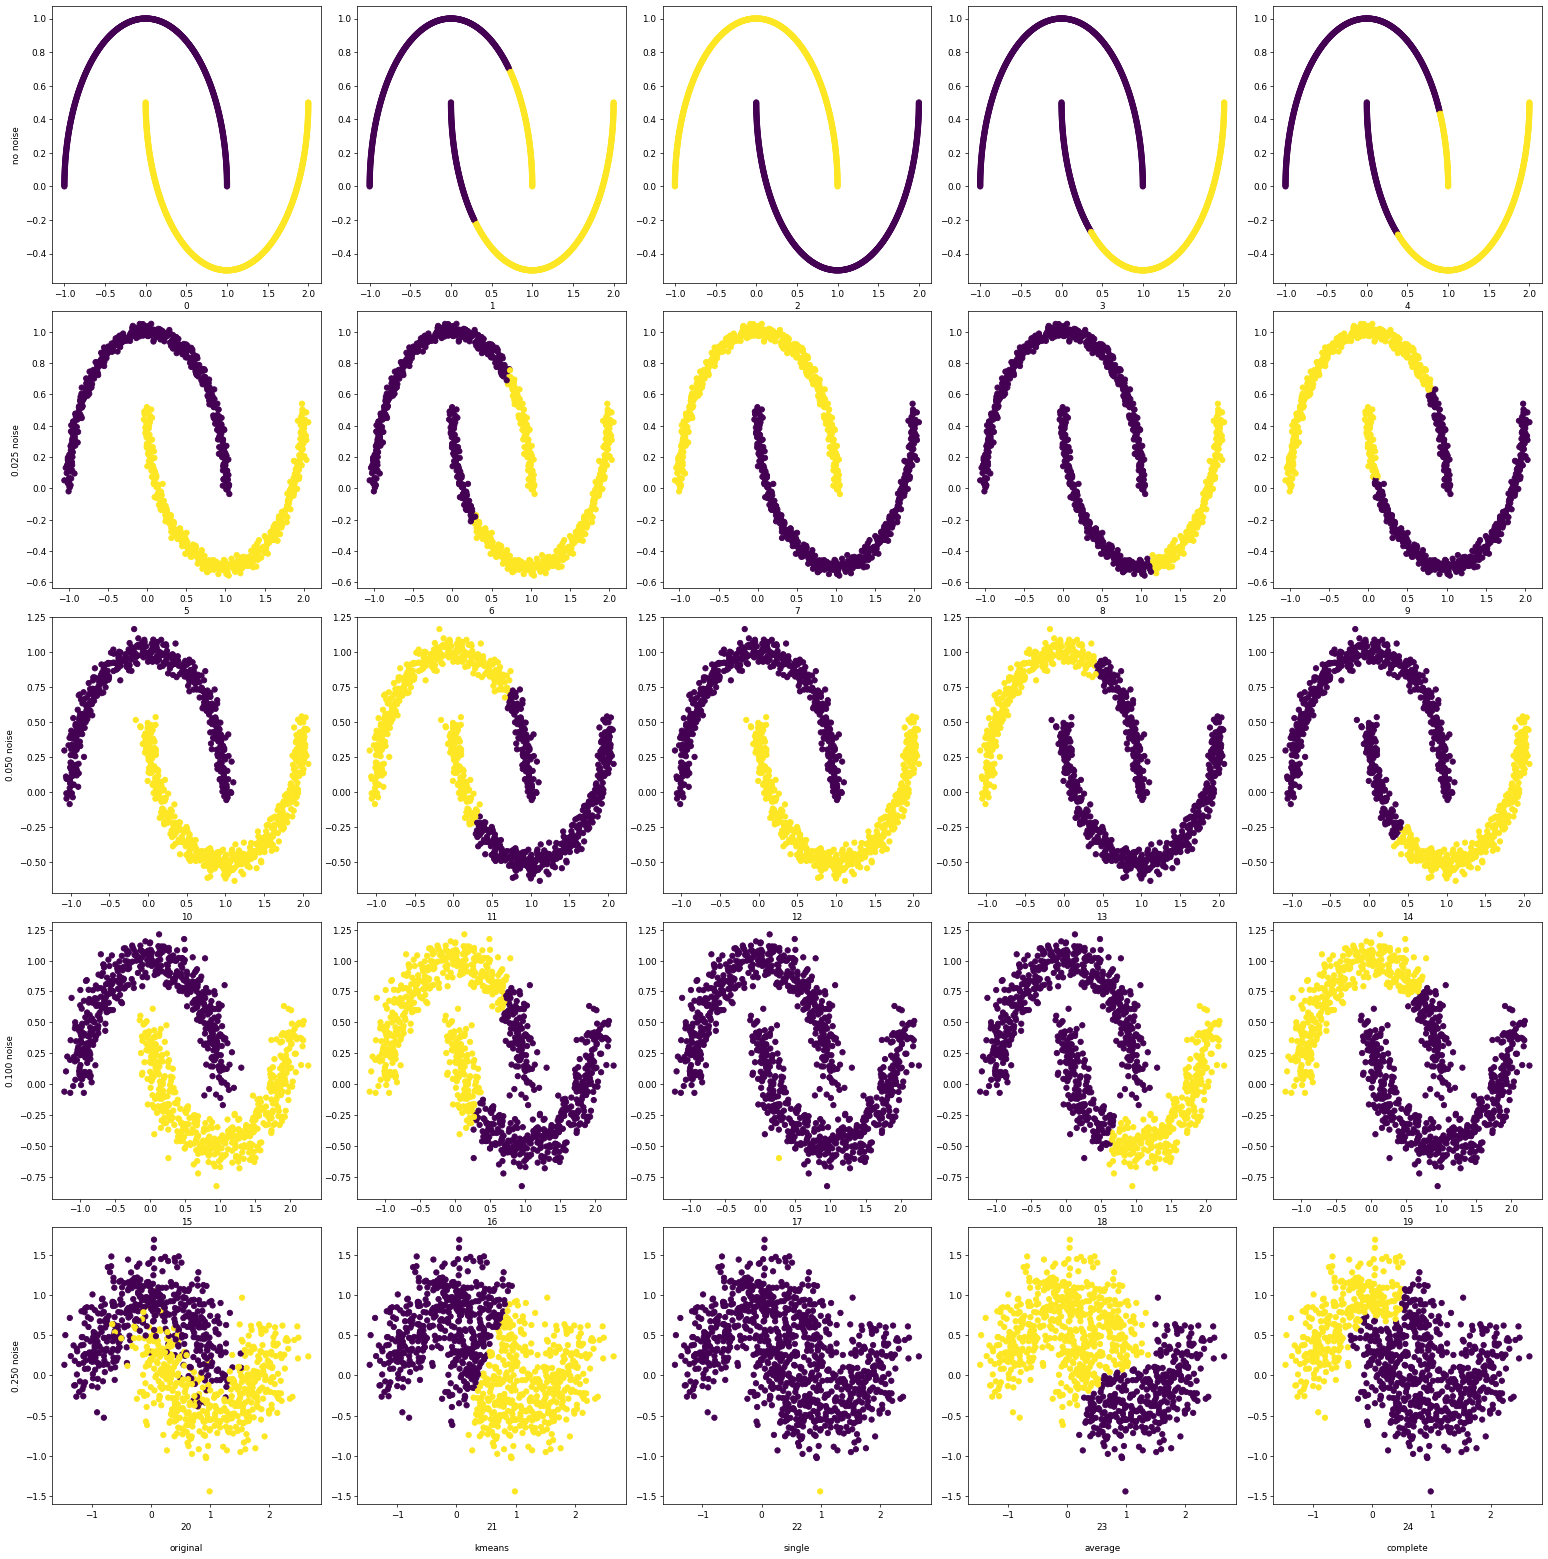

In [10]:
fig, ax = plt.subplots(5, 5, figsize=(24,24), dpi=64)

plt.tight_layout()
ax = ax.flatten()

for n in range(len(results)):
    plt.setp(ax[n], xlabel=n)

for x, label in enumerate(x_labels):
    plt.setp(ax[-5+x], xlabel=str(24-4+x)+'\n\n'+label)

for y, label in enumerate(y_labels):
    plt.setp(ax[y*5], ylabel=label)

for k, result in enumerate(results):
    ax[k].scatter(x=result['x'], y=result['y'], c=result['c'])

[6190x6231](https://i.imgur.com/oQAEt50.png)

## Mathematical comparison

In [ ]:
for idx, result in enumerate(results):
    result['id'] = idx
    size = result['c'].size
    count = sum(result['c'])
    print(
f'ID: {idx}\n\
Size: \t\t{size}\n\
Cluster 1: \t{count}\n\
Cluster 2: \t{size - count}\n'
         )

ID: 0
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 1
Size: 		1000
Cluster 1: 	501
Cluster 2: 	499

ID: 2
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 3
Size: 		1000
Cluster 1: 	301
Cluster 2: 	699

ID: 4
Size: 		1000
Cluster 1: 	374
Cluster 2: 	626

ID: 5
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 6
Size: 		1000
Cluster 1: 	497
Cluster 2: 	503

ID: 7
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 8
Size: 		1000
Cluster 1: 	277
Cluster 2: 	723

ID: 9
Size: 		1000
Cluster 1: 	472
Cluster 2: 	528

ID: 10
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 11
Size: 		1000
Cluster 1: 	499
Cluster 2: 	501

ID: 12
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 13
Size: 		1000
Cluster 1: 	359
Cluster 2: 	641

ID: 14
Size: 		1000
Cluster 1: 	497
Cluster 2: 	503

ID: 15
Size: 		1000
Cluster 1: 	500
Cluster 2: 	500

ID: 16
Size: 		1000
Cluster 1: 	496
Cluster 2: 	504

ID: 17
Size: 		1000
Cluster 1: 	1
Cluster 2: 	999

ID: 18
Size: 		1000
Cluster 1: 	340
Cluster 2: 	660

ID: 1

In [ ]:
methods = results.copy()
comparison = []
for drop in range(5):
    methods.pop(drop*5-drop)
for method in methods:   
    comparison.append({
        'id': method['id'],
        'difference': abs(500-sum(method['c'])),
    })
for comp in comparison:

    print(f'ID: {comp["id"]}\t Diff: {comp["difference"]}')

ID: 1	 Diff: 1
ID: 2	 Diff: 0
ID: 3	 Diff: 199
ID: 4	 Diff: 126
ID: 6	 Diff: 3
ID: 7	 Diff: 0
ID: 8	 Diff: 223
ID: 9	 Diff: 28
ID: 11	 Diff: 1
ID: 12	 Diff: 0
ID: 13	 Diff: 141
ID: 14	 Diff: 3
ID: 16	 Diff: 4
ID: 17	 Diff: 499
ID: 18	 Diff: 160
ID: 19	 Diff: 219
ID: 21	 Diff: 7
ID: 22	 Diff: 498
ID: 23	 Diff: 174
ID: 24	 Diff: 76


In [ ]:
min_diff_0 = min(comparison[0:4], key=lambda x:x['difference'])
min_diff_25 = min(comparison[4:8], key=lambda x:x['difference'])
min_diff_50 = min(comparison[8:12], key=lambda x:x['difference'])
min_diff_100 = min(comparison[12:16], key=lambda x:x['difference'])
min_diff_250 = min(comparison[16:20], key=lambda x:x['difference'])

pprint(comparison[1:5])
print(
f'\
0.000:\t{min_diff_0}\n\
0.025:\t{min_diff_25}\n\
0.050:\t{min_diff_50}\n\
0.100:\t{min_diff_100}\n\
0.250:\t{min_diff_250}\n\
'
)

[{'difference': 0, 'id': 2},
 {'difference': 199, 'id': 3},
 {'difference': 126, 'id': 4},
 {'difference': 3, 'id': 6}]
0.000:	{'id': 2, 'difference': 0}
0.025:	{'id': 7, 'difference': 0}
0.050:	{'id': 12, 'difference': 0}
0.100:	{'id': 16, 'difference': 4}
0.250:	{'id': 21, 'difference': 7}

